# Week3授業前課題2 住宅情報の分析

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import numpy as np
import missingno as msno

## 【問題1】データセットの取得
pd.read_csv()を使用して、変数に格納してください。

In [6]:
train = pd.read_csv("train.csv")

## 【問題2】データセット自体の調査
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。

このデータセットは機械学習を始める初心者向けのもの    
そのほかのコンペに参加する前に自身のスキルを向上させるために最適なデータセット。  

irisデータに比べカラムの数が多い  
irisデータは種類を分類することを目的にしているが、このデータセットは価格を予測することを目的にしている  
つまり、定性分析ではなく定量分析である  

## 【問題3】データの確認
データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。

各特徴量がどういったものかを見る。（数値データか文字データなど）  
今回の目的変数はどの列か確認する。  
特徴量の平均値と標準偏差、四分位数を一度に表示させる。  

In [22]:
train.dtypes.head()

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
dtype: object

In [23]:
train["SalePrice"].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [9]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 【問題4】欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。

各特徴量の欠損値の有無を確認する  
欠損値が何パーセント含まれるかを確認する。  
5つ以上欠損値がある特徴量（列）は削除する。  
欠損値があるサンプル（行）は削除する。  

欠損値の確認にはmissingnoというライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。  
インストールや使い方に関しては以下のページをご覧ください。

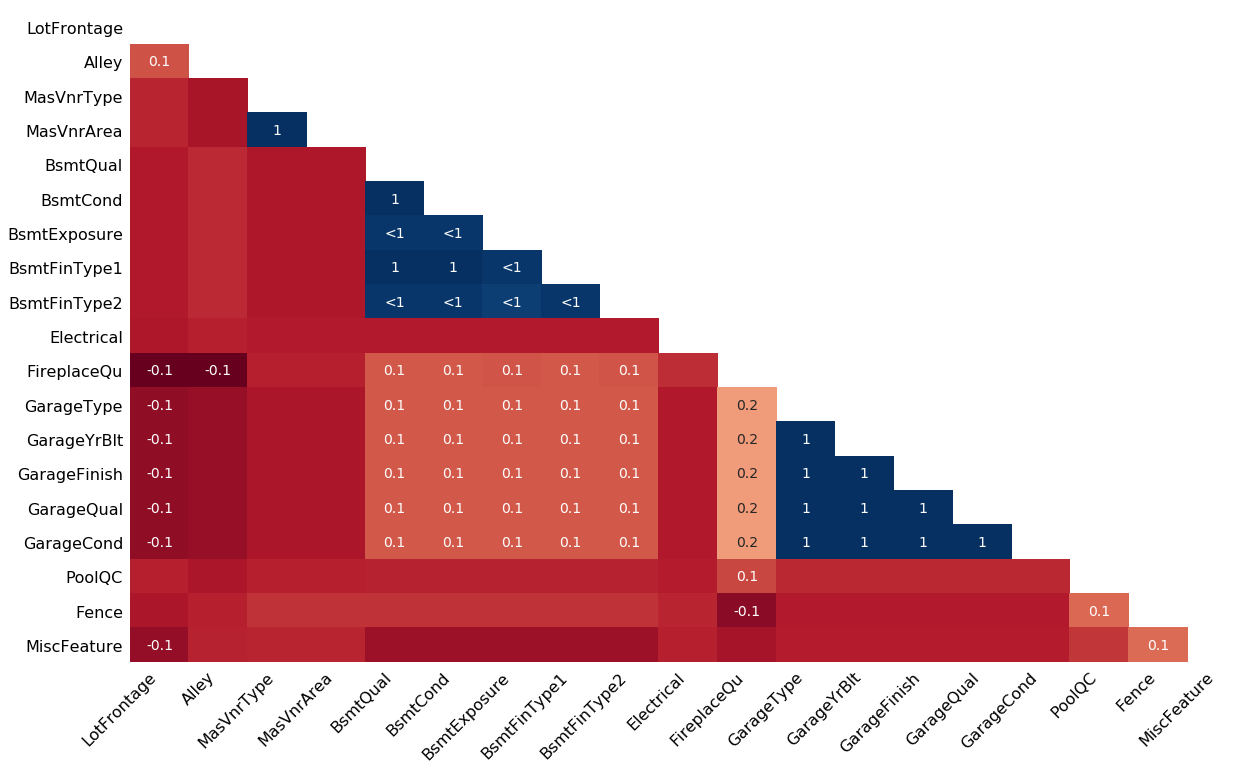

In [10]:
msno.heatmap(train)

In [11]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [12]:
defe_rate_list = []
for i in train.columns:
    defe_num = train[i].isnull().sum()
    defe_rate_list.append(round(defe_num / len(train), 2))
defe_rate_df = pd.DataFrame(defe_rate_list, columns=["defect rate"])  
defe_rate_df

,defect rate
0,0.00
1,0.00
2,0.00
3,0.18
4,0.00
5,0.00
6,0.94
7,0.00
8,0.00
9,0.00


In [13]:
drop_train = train.dropna(axis=1, thresh=1455)
drop_train.shape

(1460, 63)

In [14]:
drop_train_2 = drop_train.dropna()
drop_train_2.shape

(1459, 63)

## 【問題5】用語の調査
以下の２つの単語を知る必要があります。これらを調査してまとめてください。

尖度
歪度

尖度  
分布が正規分布からどれだけ尖っているかを表す統計量で、山の尖り度と裾の広がり度を示します。  
正規分布より尖った分布（データが平均付近に集中し、分布の裾が重い）のときには正の値を、正規分布より扁平な分布（データが平均付近から散らばり、分布の裾が軽い）のときには負の値をとります。正規分布の場合には0になります。
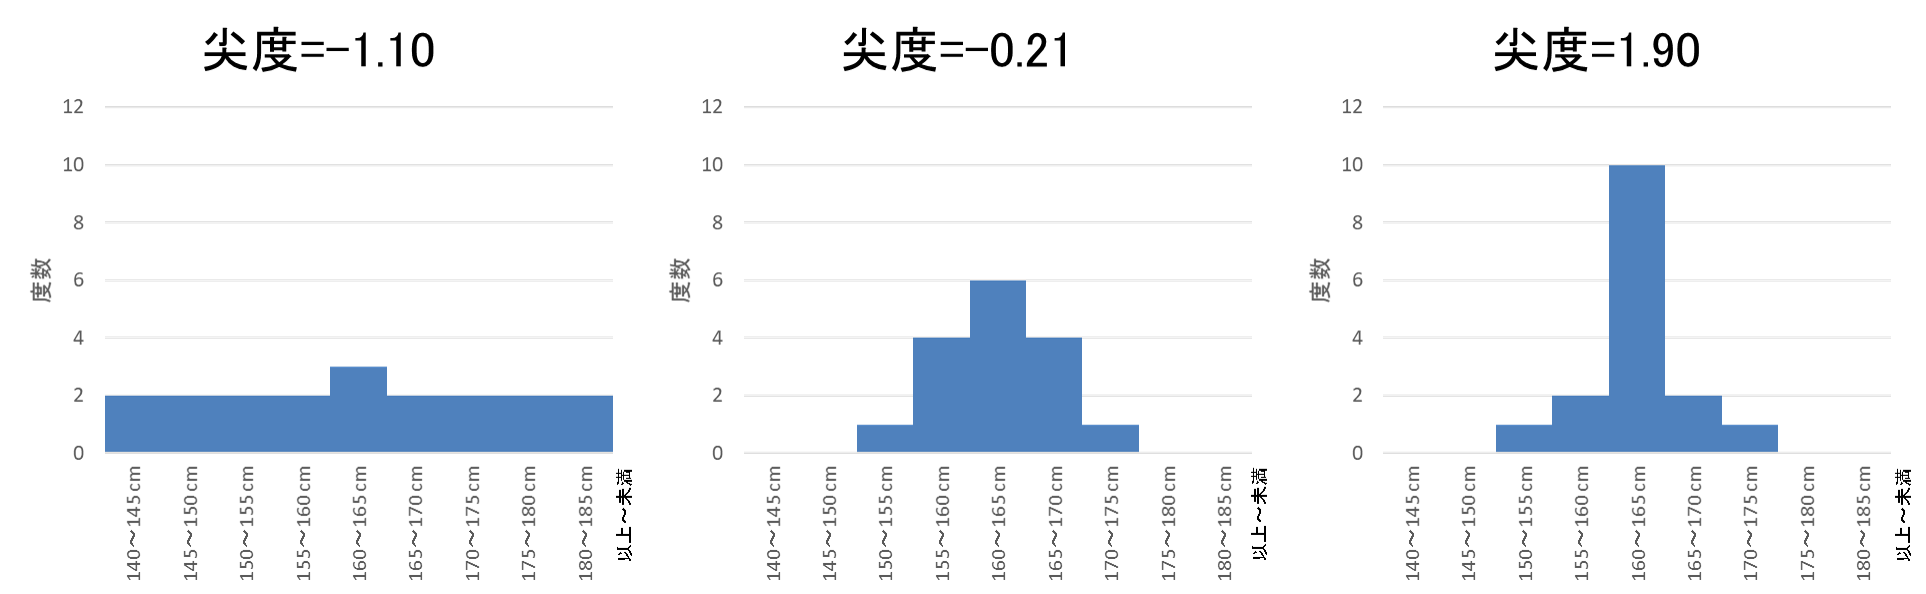

歪度  
分布が正規分布からどれだけ歪んでいるかを表す統計量で、左右対称性を示す指標のことです。  
「右裾が長い」もしくは「右に歪んだ」もしくは「左に偏った」分布のときには正の値を、「左裾が長い」もしくは「左に歪んだ」もしくは「右に偏った」分布のときには負の値をとります。左右対称の分布（例えば正規分布）の場合には0になります。
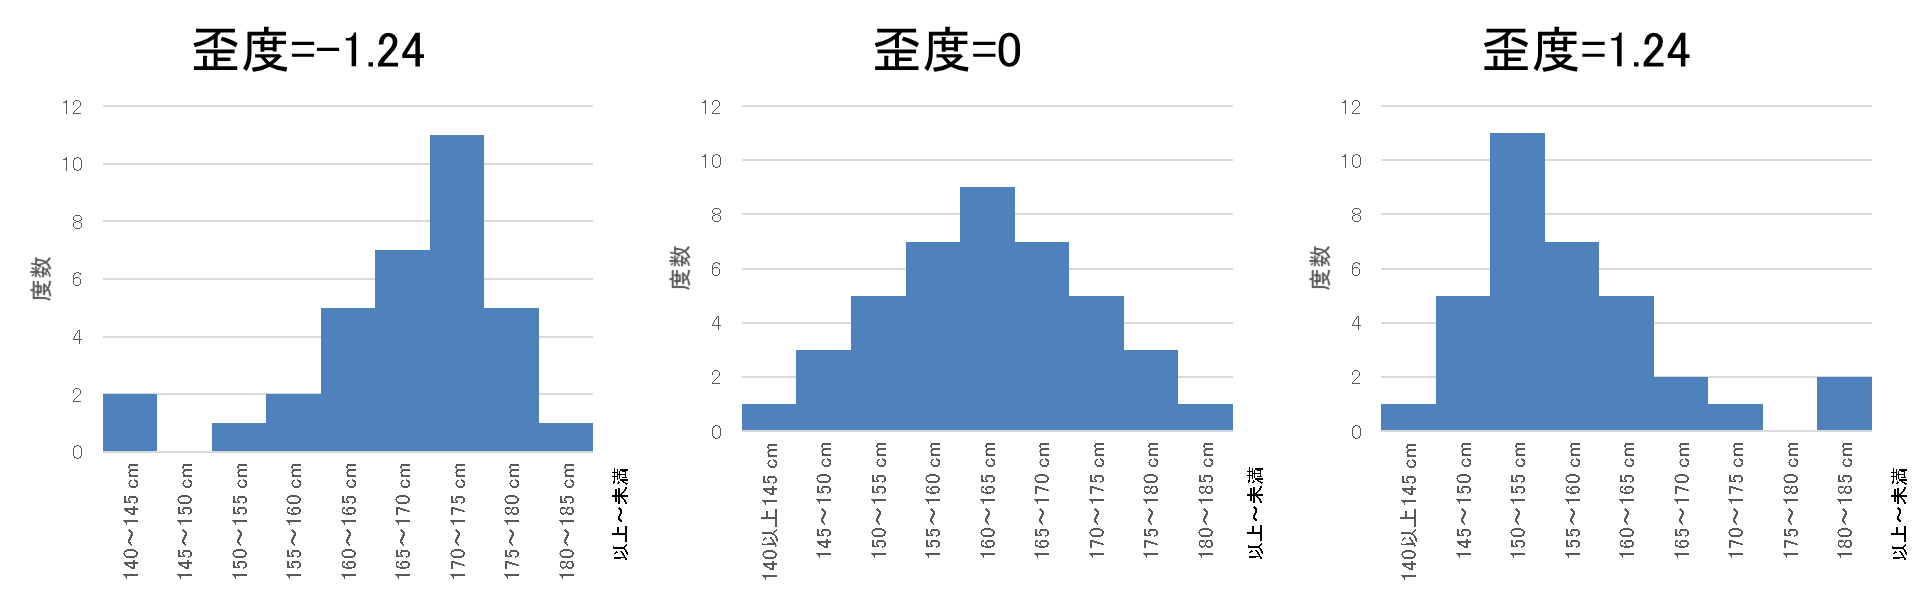

## 【課題6】分布の確認
1,seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。  
2,目的変数に対して対数変換を行う。  
3,対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。  
対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

Text(0.5, 1.0, 'sale price')

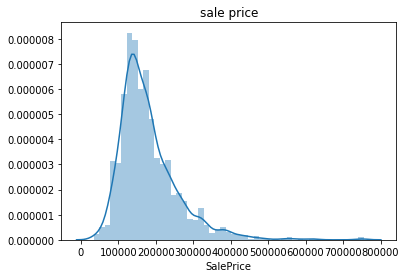

In [15]:
y = train["SalePrice"]
sns.distplot(y)
plt.title("sale price")

In [16]:
y_skew = scipy.stats.skew(y)
y_kurtosis = scipy.stats.kurtosis(y)
print("歪度：{}".format(y_skew))
print("尖度：{}".format(y_kurtosis))

歪度：1.880940746034036
尖度：6.509812011089439


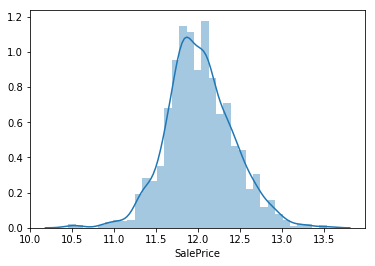

In [17]:
y_log = np.log(y)
sns.distplot(y_log)

In [18]:
y_log_skew = scipy.stats.skew(y_log)
y_log_kurtosis = scipy.stats.kurtosis(y_log)
print("歪度：{}".format(y_log_skew))
print("尖度：{}".format(y_log_kurtosis))

歪度：0.1212103673013655
尖度：0.8026555069117713


対数変換することにより正規分布に従うグラフを作成できた  
歪度、尖度共に数値が０に近づいた  

標準化することにより異なる基準を持つデータを比較しやすくなる

## 【問題7】相関係数の確認
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。

相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。  
目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。  
選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。  
選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。  

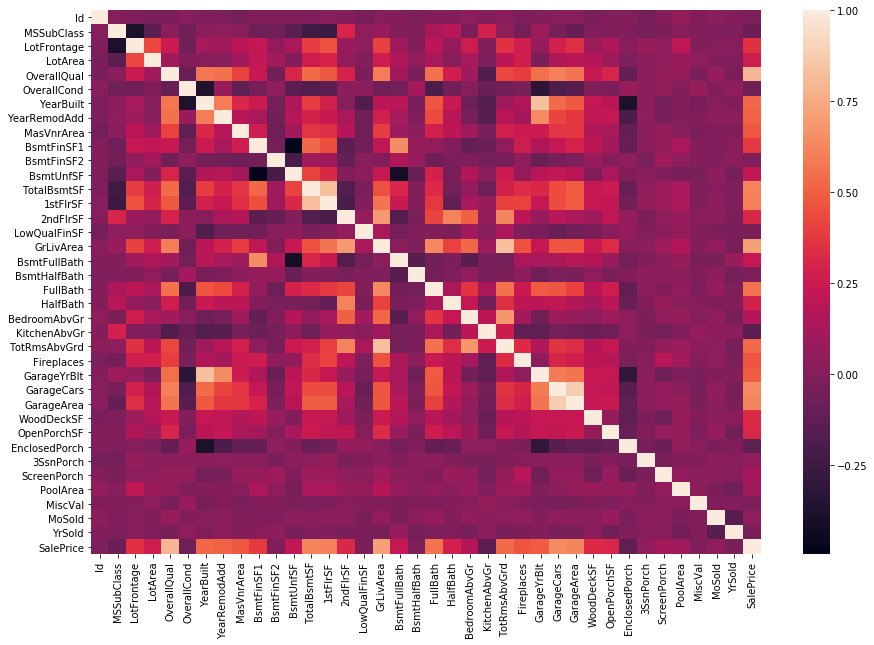

In [19]:
train_corr = train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(train_corr, xticklabels=1, yticklabels=1)

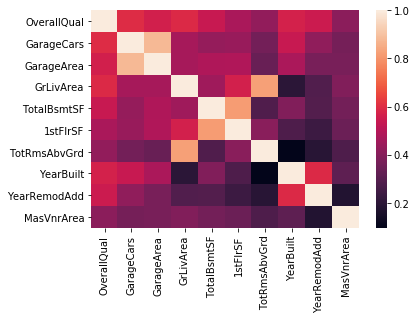

In [25]:
train_hc = train.loc[:, ["OverallQual", "GarageCars", "GarageArea", "GrLivArea", "TotalBsmtSF", "1stFlrSF", "TotRmsAbvGrd",
                "YearBuilt", "YearRemodAdd", "MasVnrArea"]]
train_hc_corr = train_hc.corr()
sns.heatmap(train_hc_corr)

<pre>
OverallQual: Overall material and finish quality  
    全体的な材料と完成時の品質
GarageCars: Size of garage in car capacity  
　　ガレージに収納できる車の数
GarageArea: Size of garage in square feet  
　　ガレージの広さ
GrLivArea: Above grade (ground) living area square feet  
　　生活面積（平方フィート）のグレード
TotalBsmtSF: Total square feet of basement area  
　　地下質の全体の面積（平方フィート）
1stFlrSF: First Floor square feet
　　一階の面積（平方フィート）
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)  
　　全体的な部屋のグレード（風呂は含まない）
YearBuilt: Original construction date  
　　元の建築年数
YearRemodAdd: Remodel date  
　　リフォームした日付
MasVnrArea: Masonry veneer area in square feet  
　　石張りの面積（平方フィート）

<pre>
GarageAreaとGarageCars

GrLivAreaとTotRmsAbvGrd

1stFlrSFとTotalBsmtSF